## Overview

Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality
#### Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: https://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


#### Attribute Information:

For more information, read [Cortez et al., 2009].
##### Input variables (based on physicochemical tests):
 1 - fixed acidity <br>
 2 - volatile acidity<br>
 3 - citric acid<br>
 4 - residual sugar<br>
 5 - chlorides<br>
 6 - free sulfur dioxide<br>
 7 - total sulfur dioxide<br>
 8 - density<br>
 9 - pH<br>
 10 - sulphates<br>
 11 - alcohol
 ##### Output variable (based on sensory data):
 12 - quality (score between 0 and 10)

In [110]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, AdaBoostClassifier, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
random.seed(68623)

# load data 


red = pd.read_csv("C:/Users\Klaus\OneDrive\Dokumente\Weiterbildungen\Data Scientist\Projektarbeit\data\winequality-red.csv",sep=";")
white = pd.read_csv("C:/Users\Klaus\OneDrive\Dokumente\Weiterbildungen\Data Scientist\Projektarbeit\data\winequality-white.csv",sep=";")

# overview of data
print(red.describe())
# print(white.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

### Preprocessing

In [203]:
## Normalizing the Dataset
# Split x and y, since only x values should be scaled
x = red.drop(columns="quality")
y = red.quality.values

# Initialize Scaler
scaler = MinMaxScaler()
# Scale dataset
xs = pd.DataFrame(scaler.fit_transform(x),columns=list(red)[0:-1])

## Split into test and train dataset

x_train, x_test, y_train, y_test = train_test_split(xs, y)

corrmat = xs.corr()

corrmat.style.background_gradient(cmap='coolwarm')

# plt.matshow(corrmat)
# plt.xticks()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


### Models

#### Classification Models

In [88]:
## Initialize Classification Models

dtc = DecisionTreeClassifier()
kNN = KNeighborsClassifier()
logr = LogisticRegression()

# estimate optimal parameters & get score

models_class=[dtc, kNN, logr]
sc_class = []

for model in models_class:
    model.fit(x_train, y_train)
    
    # get score
    score = model.score(x_test, y_test).round(3)
    sc_class.append(score)
    string = "Accurracy: {}%"
    print(model.__class__.__name__ + ":")
    print(string.format(score*100))





DecisionTreeClassifier:
Accurracy: 61.199999999999996%
KNeighborsClassifier:
Accurracy: 53.0%
LogisticRegression:
Accurracy: 59.0%


#### Optimization of parameters

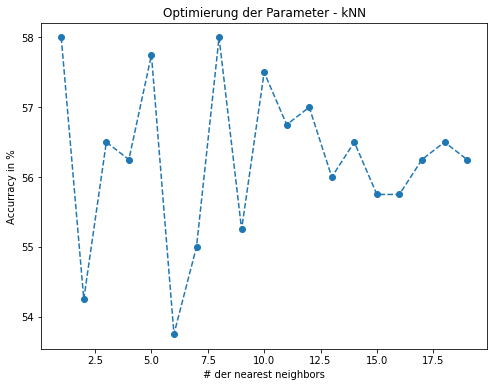

In [187]:
# kNN -> # of nearest neighbors

acc = []
rng = range(1,20)

for i in rng:
    kNN_opt = KNeighborsClassifier(n_neighbors=i)
    kNN_opt.fit(x_train,y_train)
    acc_i = kNN_opt.score(x_test, y_test)
    acc.append(acc_i*100)

kNNplot = plt.figure(figsize=(8,6))
plt.plot(rng, acc, '--o')
plt.title("Optimierung der Parameter - kNN")
plt.xlabel("# der nearest neighbors")
plt.ylabel("Accurracy in %")
plt.show()


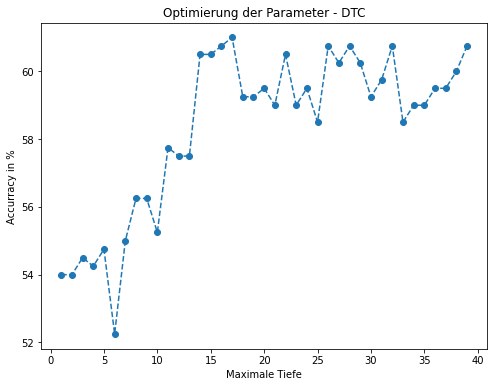

In [142]:
# dtc -> maxdepth

acc = []
rng = range(1,40)

for i in rng:
    dtc_opt = DecisionTreeClassifier(max_depth=i)
    dtc_opt.fit(x_train,y_train)
    acc_i = dtc_opt.score(x_test, y_test)
    acc.append(acc_i*100)

dtcplot = plt.figure(figsize=(8,6))
plt.plot(rng, acc, '--o')
plt.title("Optimierung der Parameter - DTC")
plt.xlabel("Maximale Tiefe")
plt.ylabel("Accurracy in %")
plt.show()


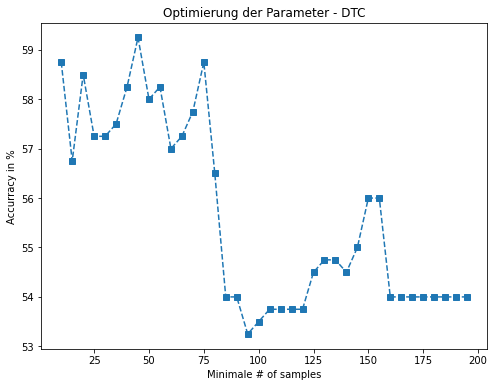

In [152]:
# dtc -> maxdepth

acc = []
rng = range(10,200,5)

for i in rng:
    dtc_opt = DecisionTreeClassifier(min_samples_leaf=i)
    dtc_opt.fit(x_train,y_train)
    acc_i = dtc_opt.score(x_test, y_test)
    acc.append(acc_i*100)

dtcplot = plt.figure(figsize=(8,6))
plt.plot(rng, acc, '--s')
plt.title("Optimierung der Parameter - DTC")
plt.xlabel("Minimale # of samples")
plt.ylabel("Accurracy in %")
plt.show()


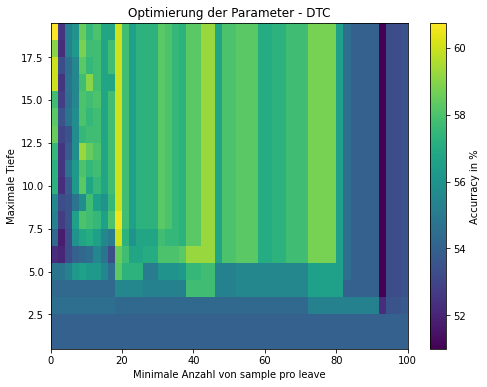

In [184]:
# Decision Tree -> Depth & # of leaves


rng1 = range(1,20)
rng2 = range(1,100,2)
acc = np.zeros((len(rng1),len(rng2)))

ii=-1
jj=-1

for i in rng1:
    ii=ii+1
    jj=-1
    for j in rng2:
        jj=jj+1
        
        dtc_opt = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
        dtc_opt.fit(x_train,y_train)
        acc_i = dtc_opt.score(x_test, y_test)*100
        acc[ii,jj]=acc_i




dtcplot = plt.figure(figsize=(8,6))
plt.pcolormesh(rng2,rng1,acc,shading="auto")

plt.title("Optimierung der Parameter - DTC")
plt.xlabel("Minimale Anzahl von samples pro leave")
plt.ylabel("Maximale Tiefe")
clb = plt.colorbar()
clb.set_label("Accurracy in %")
plt.show()



#### Regression Models

In [86]:
## Initialize Regression Models

dtr = DecisionTreeRegressor()
kNNr = KNeighborsRegressor()
linr = LinearRegression()

# estimate optimal parameters & get score

models_reg=[dtr, kNNr, linr]
sc_reg = []

for model in models_reg:
    model.fit(x_train, y_train)
    
    # get score
    score = model.score(x_test, y_test).round(3)
    sc_reg.append(score)
    string = "R²: {}"
    print(model.__class__.__name__ + ":")
    print(string.format(score))


DecisionTreeRegressor:
R²: -0.068
KNeighborsRegressor:
R²: 0.305
LinearRegression:
R²: 0.355


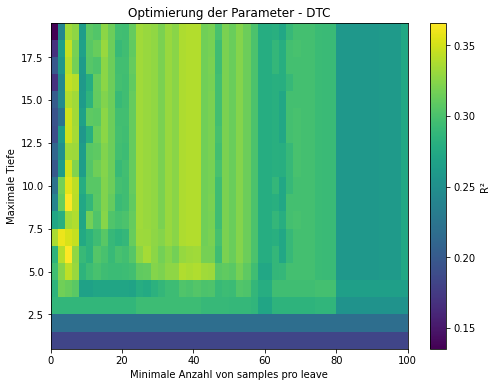

In [186]:
# Decision Tree -> Depth & # of leaves


rng1 = range(1,20)
rng2 = range(1,100,2)
acc = np.zeros((len(rng1),len(rng2)))

ii=-1
jj=-1

for i in rng1:
    ii=ii+1
    jj=-1
    for j in rng2:
        jj=jj+1
        
        dtc_opt = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        dtc_opt.fit(x_train,y_train)
        acc_i = dtc_opt.score(x_test, y_test)
        acc[ii,jj]=acc_i




dtcplot = plt.figure(figsize=(8,6))
plt.pcolormesh(rng2,rng1,acc,shading="auto")

plt.title("Optimierung der Parameter - DTR")
plt.xlabel("Minimale Anzahl von samples pro leave")
plt.ylabel("Maximale Tiefe")
clb = plt.colorbar()
clb.set_label("R²")
plt.show()


#### Ensemble Models

In [106]:
## Initialize Ensemble Models

rfc = RandomForestClassifier()
adac = AdaBoostClassifier()
rfr = RandomForestRegressor()
adar = AdaBoostRegressor()

model_vc=[]
for model in models_class:
    model_vc.append((model.__class__.__name__,model))

vc = VotingClassifier([("kNN", kNN),("dtc", dtc)])

vc.fit(x_train, y_train)



# estimate optimal parameters & get score

models=[rfc, adac, rfr, adar, vc]
sc_ens = []

for model in models:
    model.fit(x_train, y_train)
    
    # get score

    score = model.score(x_test, y_test).round(3)
    sc_ens.append(score)

    if "Classifier" in model.__class__.__name__:
        string = "Accurracy: {}%"
        print(model.__class__.__name__ + ":")
        print(string.format(score*100))

    else:
        string = "R²: {}"
        print(model.__class__.__name__ + ":")
        print(string.format(score))


RandomForestClassifier:
Accurracy: 70.8%
AdaBoostClassifier:
Accurracy: 53.5%
RandomForestRegressor:
R²: 0.527
AdaBoostRegressor:
R²: 0.426
VotingClassifier:
Accurracy: 59.8%


## SVM